In [ ]:
from google.colab import drive
drive.mount('/content/drive')


ValueError: mount failed

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary library
import pandas as pd

# Step 3: Load your given training CSV (adjust the path if needed)
input_path = '/content/drive/MyDrive/eye_dataset/Training_Set/train_label.csv'  # Change if your file is elsewhere
train_df = pd.read_csv(input_path)

# Step 4: Select only 'ID' and 'Disease_Risk' columns
id_disease_risk_df = train_df[['ID', 'Disease_Risk']]

# Step 5: Save the new file to Google Drive
output_path = '/content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv'
id_disease_risk_df.to_csv(output_path, index=False)

print(f"New CSV file saved at: {output_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
New CSV file saved at: /content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv


In [ ]:
import pandas as pd

csv_path = '/content/drive/MyDrive/eye_dataset/Training_Set/normalities_prob.csv'

df=pd.read_csv(csv_path);

print(df.head());

print(df.columns);

print(df.info())

   ID  Disease_Risk
0   1             1
1   2             1
2   3             1
3   4             1
4   5             1
Index(['ID', 'Disease_Risk'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            1920 non-null   int64
 1   Disease_Risk  1920 non-null   int64
dtypes: int64(2)
memory usage: 30.1 KB
None


In [ ]:
row_sum=df.iloc[0,1:].sum();
print("The total number f positive labels in the first row ",row_sum);

The total number f positive labels in the first row  2


In [ ]:
total_people_in_risk= (df["Disease_Risk"]==1).sum()

In [ ]:
print("Total people in risk",total_people_in_risk);

Total people in risk 1519


In [ ]:
positive_counts=(df.drop(columns=['ID'])==1).sum();
print(positive_counts)

Disease_Risk    1519
DR               376
ARMD             100
MH               317
DN               138
MYA              101
BRVO              73
TSLN             186
ERM               14
LS                47
MS                15
CSR               37
ODC              282
CRVO              28
TV                 6
AH                16
ODP               65
ODE               58
ST                 5
AION              17
PT                11
RT                14
RS                43
CRS               32
EDN               15
RPEC              22
MHL               11
RP                 6
OTHER             34
dtype: int64


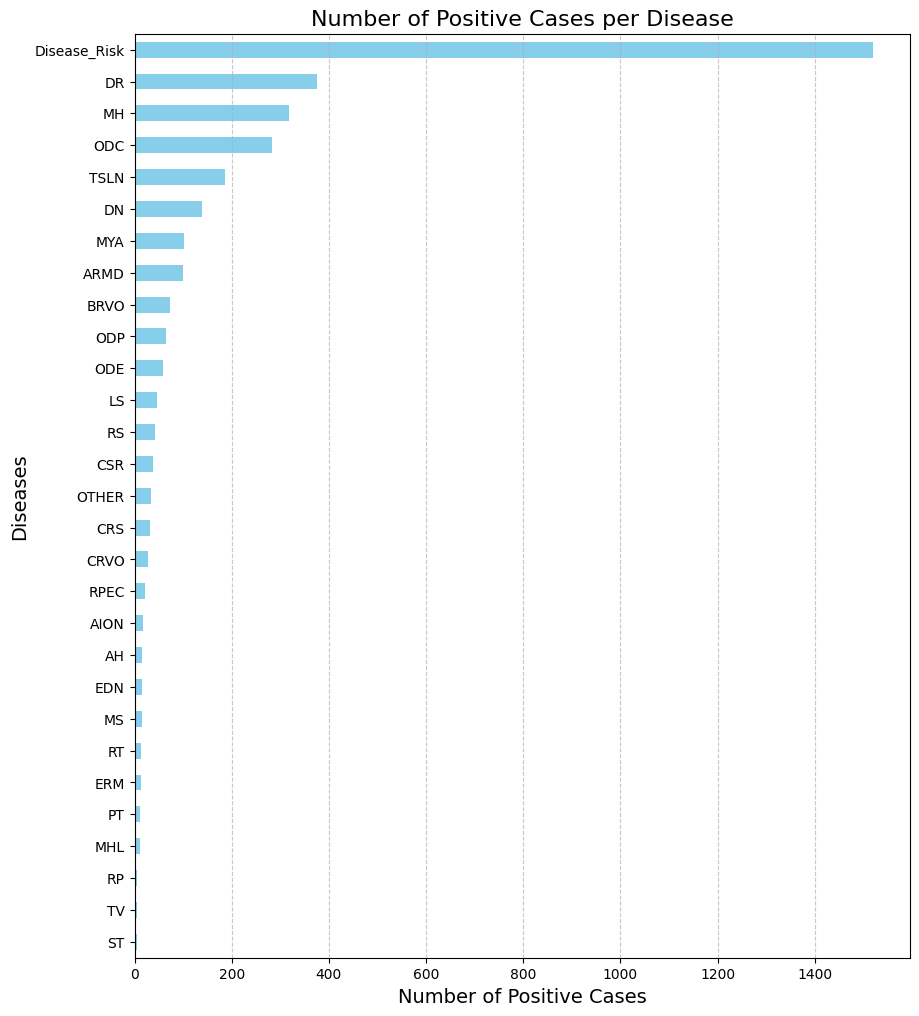

In [ ]:
import matplotlib.pyplot as plt

# Drop 'ID' column and count 1's
positive_counts = (df.drop(columns=['ID']) == 1).sum()

# Sort diseases by frequency
positive_counts = positive_counts.sort_values(ascending=True)  # Ascending for better horizontal bar look

# Plot
plt.figure(figsize=(10, 12))
positive_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Positive Cases per Disease', fontsize=16)
plt.xlabel('Number of Positive Cases', fontsize=14)
plt.ylabel('Diseases', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


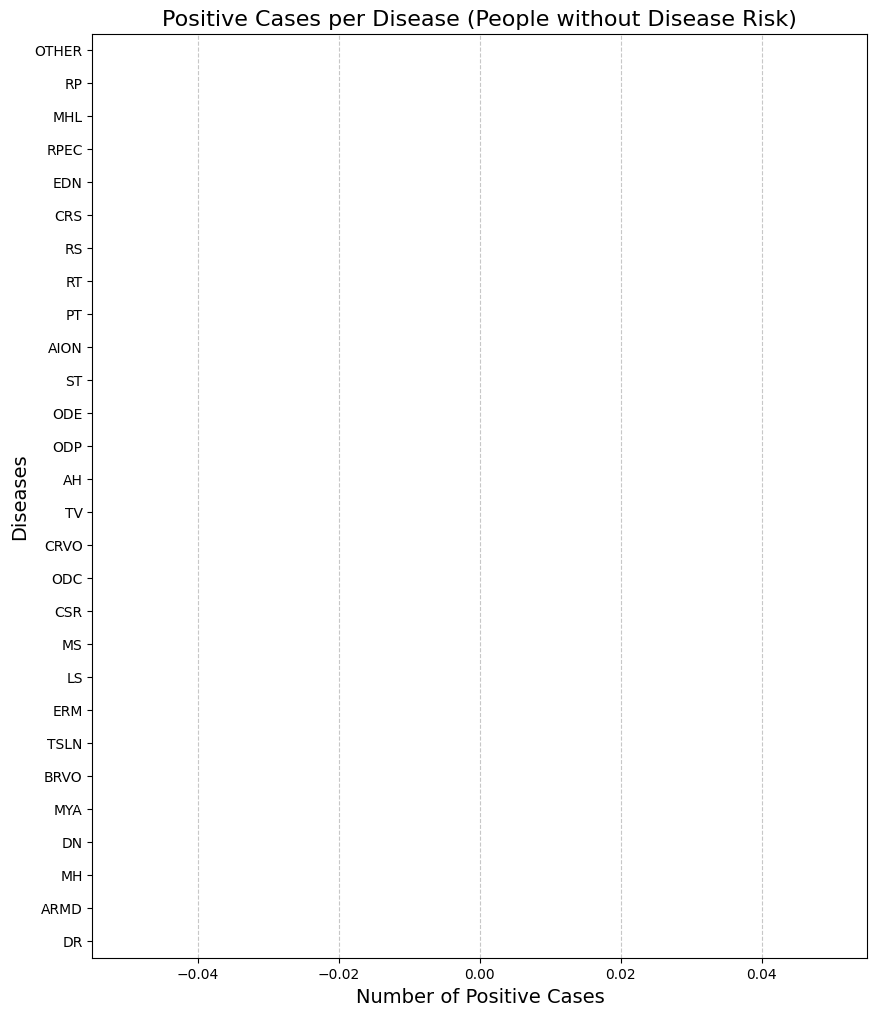

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Filter people who are NOT at risk
healthy_df = df[df['Disease_Risk'] == 0]

# Step 2: Drop 'ID' and 'Disease_Risk' columns
healthy_labels = healthy_df.drop(columns=['ID', 'Disease_Risk'])

# Step 3: Count positives
healthy_counts = (healthy_labels == 1).sum()

# Step 4: Sort for better plotting
healthy_counts = healthy_counts.sort_values(ascending=True)

# Step 5: Plot
plt.figure(figsize=(10, 12))
healthy_counts.plot(kind='barh', color='lightgreen')
plt.title('Positive Cases per Disease (People without Disease Risk)', fontsize=16)
plt.xlabel('Number of Positive Cases', fontsize=14)
plt.ylabel('Diseases', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Step 1: Filter people who are NOT at risk
healthy_df = df[df['Disease_Risk'] == 0]

# Step 2: Drop 'ID' and 'Disease_Risk' columns (only diseases remain)
healthy_labels = healthy_df.drop(columns=['ID', 'Disease_Risk'])

# Step 3: Check if all disease labels are 0
any_disease = (healthy_labels.sum(axis=1) > 0)

# Step 4: How many "healthy" people actually have any disease
num_with_disease = any_disease.sum()

print(f"Number of people with Disease_Risk == 0 but have some disease:", num_with_disease)


Number of people with Disease_Risk == 0 but have some disease: 0


Selected Image: 1836.png
Resolution: 2048x1536


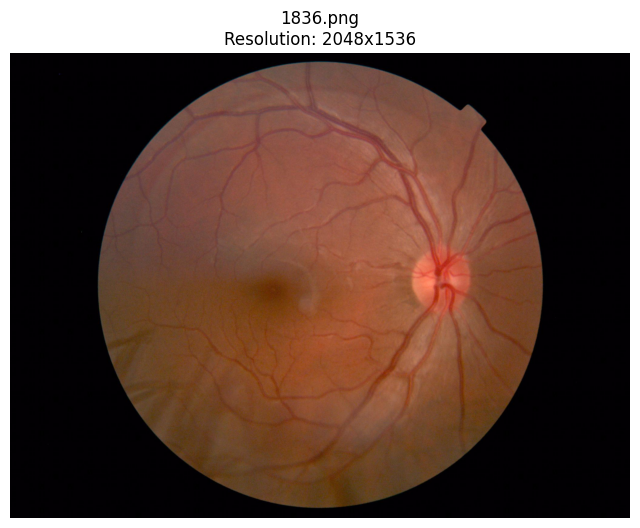

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to your images
img_dir = "/content/drive/MyDrive/eye_dataset/Training_Set/Training"

# Get all PNG image files
image_files = [f for f in os.listdir(img_dir) if f.endswith('png')]

# Pick the 5th image
selected_image_file = image_files[10]
print(f"Selected Image: {selected_image_file}")

# Full path to the image
image_path = os.path.join(img_dir, selected_image_file)

# Open the image
image = Image.open(image_path)

# Get resolution
width, height = image.size
print(f"Resolution: {width}x{height}")

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.title(f"{selected_image_file}\nResolution: {width}x{height}")
plt.axis('off')
plt.show()


In [ ]:
import os
from PIL import Image

# Path to your images
img_dir = "/content/drive/MyDrive/eye_dataset/Training_Set/Training"

# Get all PNG image files
image_files = [f for f in os.listdir(img_dir) if f.endswith('png')]

# Loop over all images
for img_file in image_files:
    # Full path to the image
    img_path = os.path.join(img_dir, img_file)

    # Open the image
    image = Image.open(img_path)

    # Get width and height
    width, height = image.size

    # Print filename and resolution
    print(f"Image: {img_file} --> Resolution: {width}x{height}")


Image: 1827.png --> Resolution: 2048x1536
Image: 1828.png --> Resolution: 2048x1536
Image: 1829.png --> Resolution: 2048x1536
Image: 183.png --> Resolution: 2144x1424
Image: 1830.png --> Resolution: 2048x1536
Image: 1831.png --> Resolution: 2048x1536
Image: 1832.png --> Resolution: 2048x1536
Image: 1833.png --> Resolution: 2048x1536
Image: 1834.png --> Resolution: 2048x1536
Image: 1835.png --> Resolution: 2048x1536
Image: 1836.png --> Resolution: 2048x1536
Image: 1837.png --> Resolution: 2048x1536
Image: 1838.png --> Resolution: 2048x1536
Image: 1839.png --> Resolution: 2048x1536
Image: 184.png --> Resolution: 2144x1424
Image: 1840.png --> Resolution: 2048x1536
Image: 1841.png --> Resolution: 2048x1536
Image: 1842.png --> Resolution: 2048x1536
Image: 1843.png --> Resolution: 2048x1536
Image: 1844.png --> Resolution: 2048x1536
Image: 1845.png --> Resolution: 2048x1536
Image: 1846.png --> Resolution: 2048x1536
Image: 1847.png --> Resolution: 2048x1536
Image: 1848.png --> Resolution: 2048

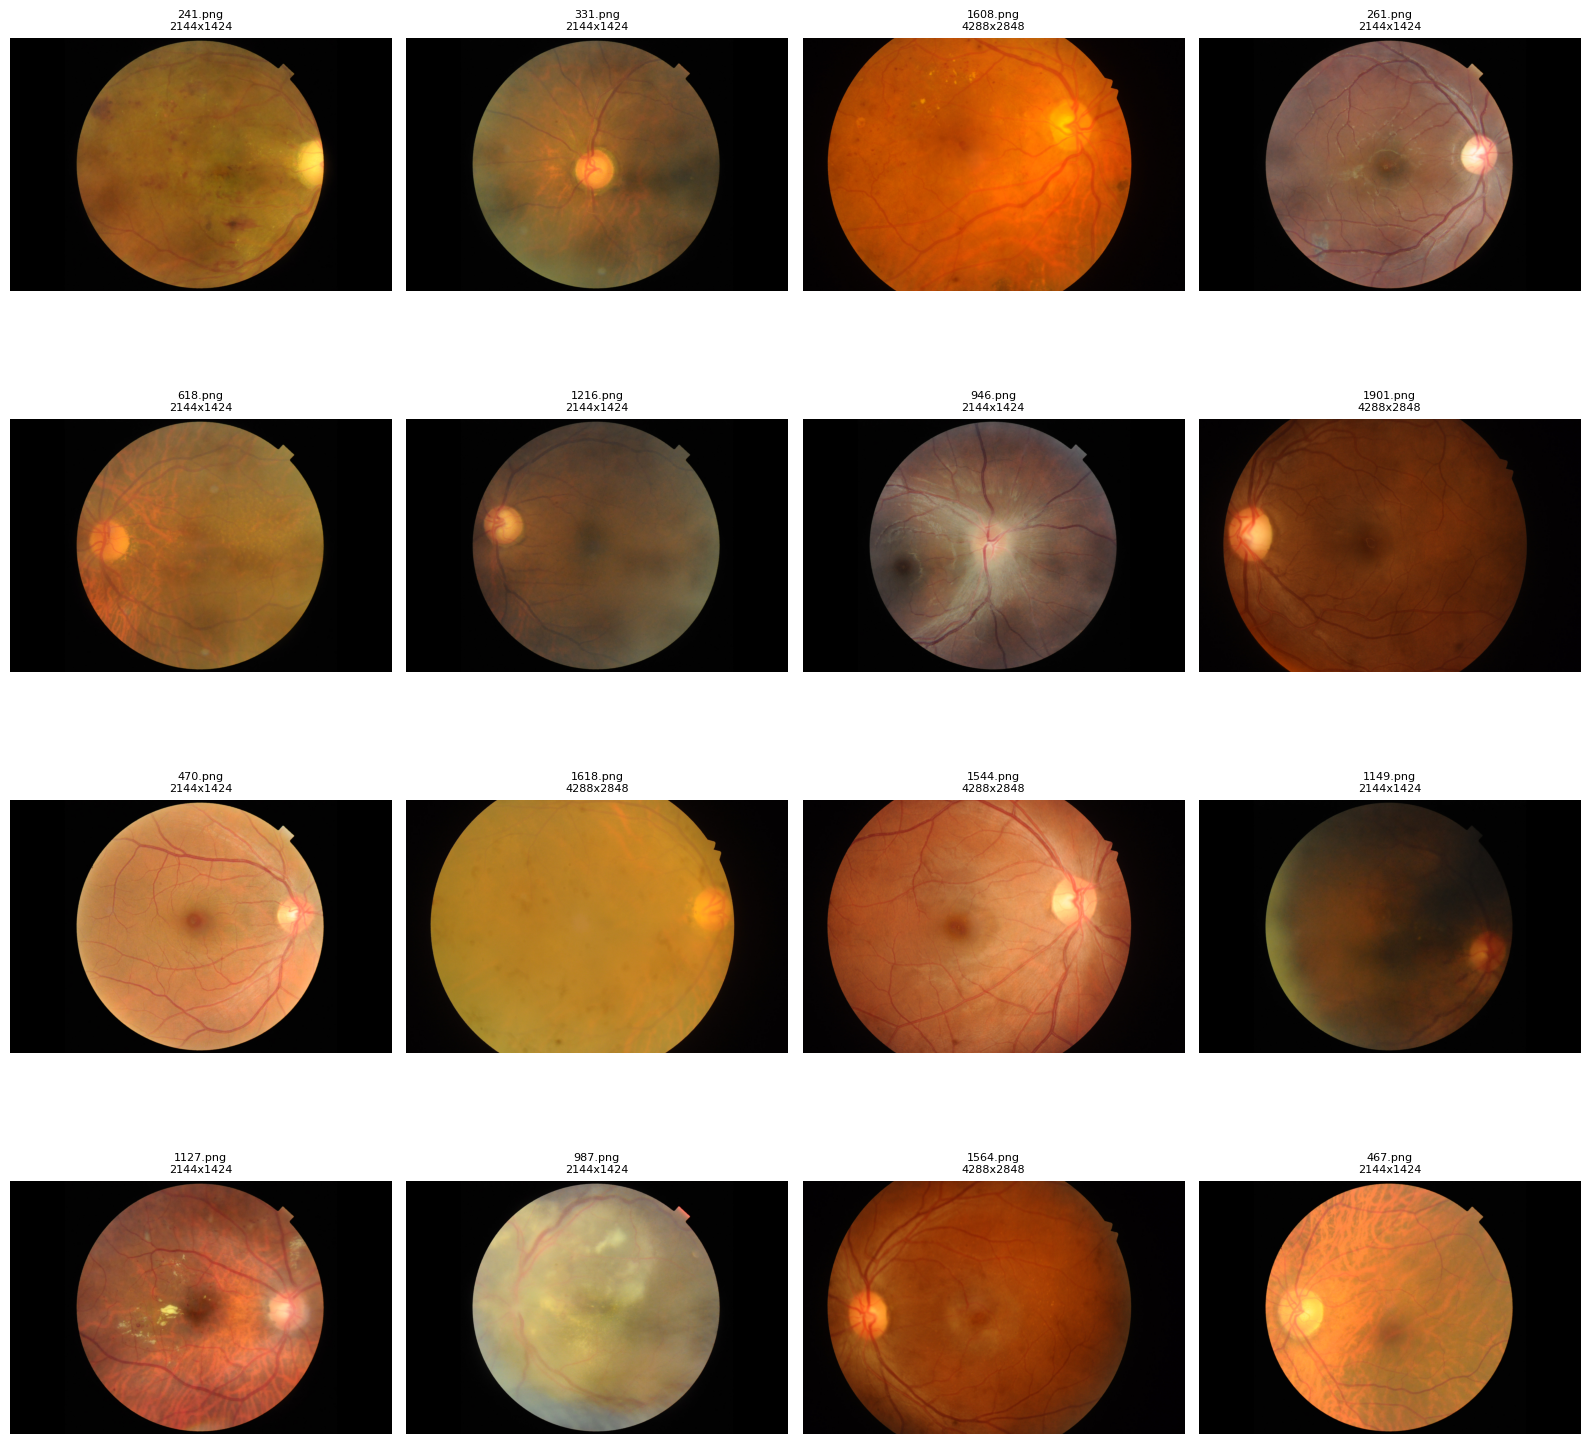

In [ ]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Path to your images
img_dir = "/content/drive/MyDrive/eye_dataset/Training_Set/Training"

# Get all PNG image files
image_files = [f for f in os.listdir(img_dir) if f.endswith('png')]

# Randomly select 16 images
selected_files = random.sample(image_files, 16)

# Set up the grid
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Flatten axes array for easy looping
axes = axes.flatten()

# Loop through selected files and axes
for idx, (img_file, ax) in enumerate(zip(selected_files, axes)):
    img_path = os.path.join(img_dir, img_file)
    image = Image.open(img_path)

    # Get resolution
    width, height = image.size

    # Display image
    ax.imshow(image)
    ax.set_title(f"{img_file}\n{width}x{height}", fontsize=8)
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import os
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import torch
from torchvision import transforms

class RetinalImageDataset(Dataset):
    def __init__(self, img_dir, labels_file, transform=None):
        """
        Args:
            img_dir (string): Directory with all the images.
            labels_file (string): Path to the CSV file with labels.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.img_dir = img_dir
        self.labels_df = pd.read_csv(labels_file)
        self.transform = transform

    def __len__(self):
        # Return the number of samples in the dataset
        return len(self.labels_df)

    def __getitem__(self, idx):
        # Assuming first column in the CSV is the image ID (e.g., 1, 2, 3, etc.)
        img_name = f"{self.labels_df.iloc[idx, 0]}.png"  # Add the `.png` extension to the ID
        img_name = os.path.join(self.img_dir, img_name)  # Construct the full image path
        image = Image.open(img_name).convert("RGB")  # Open image and convert to RGB

        # Get the Disease_Risk label (binary: 1 for abnormal, 0 for normal)
        label = torch.tensor(self.labels_df.iloc[idx, 1])  # Assuming Disease_Risk is in the second column

        if self.transform:
            image = self.transform(image)

        return image, label

# Define the train transform for EfficientNet-B2
train_transform = transforms.Compose([
    transforms.Resize((260, 260)),  # Resize to 260x260
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize for EfficientNet-B2
])

# Define paths for training data and labels
train_data_dir = "/content/drive/MyDrive/eye_dataset/Training_Set/Training"  # Update with your dataset path
labels_file = "/content/drive/MyDrive/eye_dataset/Training_Set/train_label.csv"  # Update with the actual path to the labels CSV

# Create the dataset
train_dataset = RetinalImageDataset(img_dir=train_data_dir, labels_file=labels_file, transform=train_transform)

# Create the train DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=2)

# Check the first batch to make sure everything is working
images, labels = next(iter(train_loader))
print(f"Batch size: {len(images)}")
print(f"Image shape: {images.shape}")
print(f"Labels shape: {labels.shape}")


Batch size: 8
Image shape: torch.Size([8, 3, 260, 260])
Labels shape: torch.Size([8])


In [ ]:
# Calculate the size of the DataLoader
num_samples = len(train_loader.dataset)  # Total number of samples in the dataset
batch_size = train_loader.batch_size  # Batch size you specified in the DataLoader

num_batches = num_samples // batch_size  # Number of full batches
if num_samples % batch_size != 0:
    num_batches += 1  # Add 1 more batch if there are remaining samples

print(f"Total number of samples: {num_samples}")
print(f"Batch size: {batch_size}")
print(f"Total number of batches: {num_batches}")


Total number of samples: 1920
Batch size: 8
Total number of batches: 240
